In [61]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
%matplotlib inline

In [45]:
df_car=pd.read_csv('cars-dataset.csv')
df_car.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [46]:
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [47]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


As 'hp' coulmn is containing special character 
and its type is object so we will replace it with mean and convert the column into integer

In [48]:
df_car.shape

(398, 8)

In [49]:
import numpy as np
df_car['hp']=df_car.hp.apply(lambda x: np.where(x.isdigit(),x,'0'))

In [50]:
df_car['hp']=df_car['hp'].astype('int')

In [51]:
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,102.894472,40.269544,0.0,75.000,92.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [52]:
df_car.loc[ df_car['hp'] == 0, 'hp' ] = df_car['hp'].mean()

In [53]:
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.445645,38.199671,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


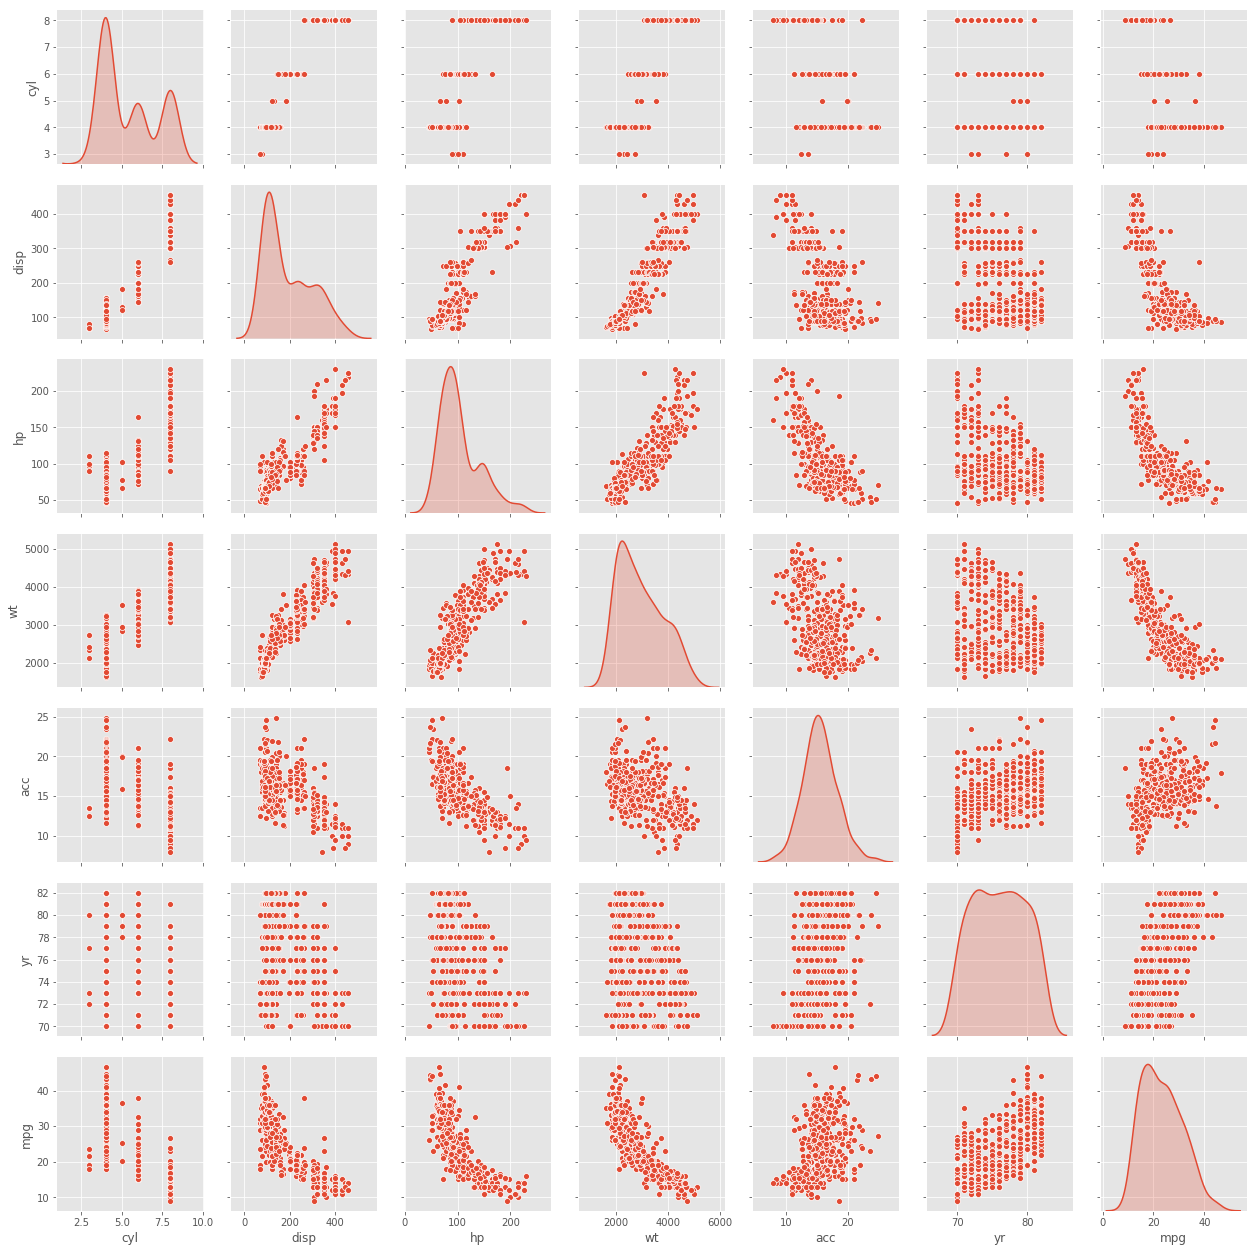

In [54]:
sns.pairplot(df_car, diag_kind='kde')

Through above graph we can interprate that we say approx 3 Gaussians are overlapping for 'cyl','disp','hp' and for 'acc' its 
noramal curve so it might be the case that gaussions are overlapping with each other which is currently not visible 
through this graph.
so we can assume that we can have 3-4 clusters .

In [124]:
X = df_car.drop(['car name'], axis = 1)

In [125]:
from sklearn.preprocessing import normalize
data_scaled = normalize(X)
X_scaled = pd.DataFrame(data_scaled, columns=X.columns)
X_scaled.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0.005113
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0.004039
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0.005210
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0.004637
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0.004905


In [126]:
X = X_scaled.drop(['mpg'], axis = 1)
y = X_scaled['mpg']

In [127]:
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z , pdist(X))
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(X, 'average')
c, coph_dists = cophenet(Z , pdist(X))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(X, 'complete')
c, coph_dists = cophenet(Z , pdist(X))
print("Complete",c)
Z = linkage(X, 'single')
c, coph_dists = cophenet(Z , pdist(X))
print("Single",c)

Ward 0.7475859187006394
Average 0.8075379752570387
Complete 0.7229415611714082
Single 0.6214858823259382


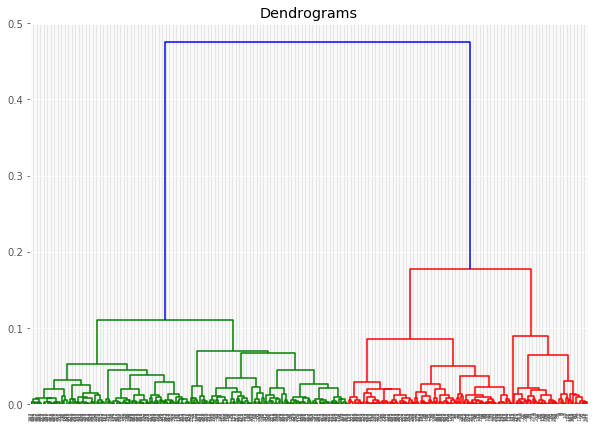

In [128]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

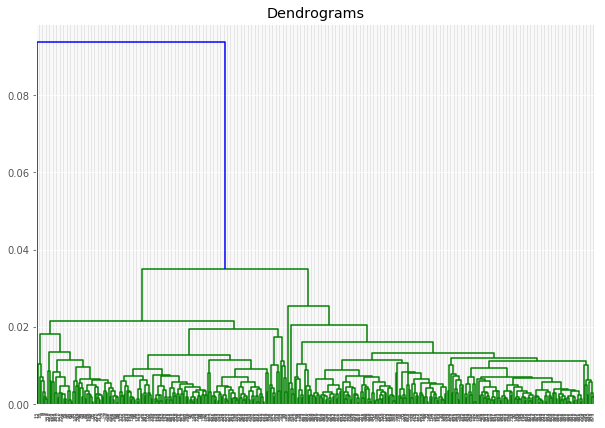

In [129]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='average'))

Through Dendogram we can say that through ward method we are getting somewhat distributed clusters.So we are proceeding 
with Ward.

In [131]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 3, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0,
       2, 2, 1, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 3, 2, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1,
       1, 3, 1, 1, 1, 0, 0, 3, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 3, 1, 3,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 1, 2, 1, 1, 3, 1, 1, 3,
       2, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 3, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 3, 1, 3, 1,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3, 1, 3, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 3, 3, 3, 3, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 3, 3, 3, 3, 1, 0, 1, 2,

In [132]:
X['labels'] = cluster.labels_
X.groupby(["labels"]).count()

,cyl,disp,hp,wt,acc,yr
labels,,,,,,
0,54,54,54,54,54,54
1,113,113,113,113,113,113
2,117,117,117,117,117,117
3,114,114,114,114,114,114


In [133]:
Cluster = X.groupby(['labels'])
Group=Cluster.head(5)

In [135]:
X['mpg'] = X_scaled['mpg']

In [136]:
X.head(10)

,cyl,disp,hp,wt,acc,yr,labels,mpg
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0,0.005113
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0,0.004039
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0,0.005210
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0,0.004637
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0,0.004905
5,0.001832,0.098231,0.045338,0.993991,0.002290,0.016028,0,0.003435
6,0.001825,0.103565,0.050186,0.993219,0.002053,0.015968,0,0.003194
7,0.001843,0.101375,0.049535,0.993475,0.001958,0.016128,0,0.003226
8,0.001796,0.102141,0.050509,0.993353,0.002245,0.015714,0,0.003143
9,0.002064,0.100644,0.049032,0.993537,0.002194,0.018064,0,0.003871


In [137]:
cluster1 = X[X['labels'] == 0] 
cluster2 = X[X['labels'] == 1] 
cluster3 = X[X['labels'] == 2] 
cluster4 = X[X['labels'] == 3] 

In [138]:
cluster1=cluster1.drop('labels', axis = 1)
cluster2=cluster2.drop('labels', axis = 1)
cluster3=cluster3.drop('labels', axis = 1)
cluster4=cluster4.drop('labels', axis = 1)

In [139]:
cluster1_X = cluster1.drop('mpg', axis = 1)
cluster1_y = cluster1['mpg']
cluster2_X = cluster2.drop('mpg', axis = 1)
cluster2_y = cluster2['mpg']
cluster3_X = cluster3.drop('mpg', axis = 1)
cluster3_y = cluster3['mpg']
cluster4_X = cluster4.drop('mpg', axis = 1)
cluster4_y = cluster4['mpg']

In [150]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(cluster1_X, cluster1_y)
# print intercept and coefficients
print("Cluster 1 model coefficient :" , model1.coef_)

Cluster 1 model coefficient : [0.1925122  0.0982068  0.00722318 0.71562314 0.60569997 0.21923916]


In [151]:
model2 = LinearRegression()
model2.fit(cluster2_X, cluster2_y)
# print intercept and coefficients
print("Cluster 2 model coefficient :" ,model2.coef_)

Cluster 2 model coefficient : [ -0.53895278  -0.80665889  -0.62199181 -15.12693734  -0.60029634
   0.25768773]


In [152]:
model3 = LinearRegression()
model3.fit(cluster3_X, cluster3_y)
# print intercept and coefficients
print("Cluster 3 model coefficient :" ,model3.coef_)

Cluster 3 model coefficient : [ 0.40806951 -0.39670161 -0.22204682 -5.38465516 -0.33311246  0.36807111]


In [153]:
model4 = LinearRegression()
model4.fit(cluster4_X, cluster4_y)
# print intercept and coefficients
print("Cluster 4 model coefficient :" ,model4.coef_)

Cluster 4 model coefficient : [  4.48491024  -1.23565627  -1.11502925 -28.44633397  -0.64118427
  -0.78344048]
